## HW5 Christie Woodside World Bank EDA

In [38]:
import wbdata
import wbgapi as wb
import pandas as pd
#import datetime
import numpy as np

'''Using this code from Prof just so I can get the same dataframe as her and verify what I am doing
is correct. Also easier to get help'''

indicators = { #from homework
    'EN.ATM.CO2E.PC': 'CO2Emissions',
    'NY.GDP.PCAP.PP.KD': 'GDPpercapita',
    'GB.XPD.RSDV.GD.ZS': 'Research',
    'NE.TRD.GNFS.ZS': 'Trade',
    'EG.FEC.RNEW.ZS': 'RenewableEnergy',
    'NV.MNF.TECH.ZS.UN': 'MedAndHighTechInd',
    'SP.URB.TOTL.IN.ZS': 'Urban',
    'EG.USE.PCAP.KG.OE': 'EnergyUse'
}
raw_data = wb.data.DataFrame(list(indicators.keys()))

cleaned_data = raw_data.rename(columns=lambda x: x.lstrip("YR") if x.startswith("YR") else x)
cleaned_data = cleaned_data.rename(index=indicators)

cleaned_data.index.set_names(["Country", "Indicator"], inplace=True)
cleaned_data.columns = pd.to_numeric(cleaned_data.columns)
cleaned_data.columns.name = "Year"

filtered_data = cleaned_data.loc[:, 1990:2020]
filtered_data.to_csv("wb_data.csv")   #so it doesn't compute over and over


In [39]:
data = pd.read_csv('wb_data.csv')
countries = wbdata.get_countries()

country_metadata = pd.DataFrame({
    'countryCode': [c['id'] for c in countries],
    'country': [c['name'] for c in countries],
    'incomeLevel': [c['incomeLevel']['value'] for c in countries]
})

In [43]:
levels = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
clean_country__metadata = country_metadata[country_metadata['incomeLevel'].isin(levels)]
merged_data = pd.merge(data, clean_country__metadata, left_on='Country', right_on='countryCode', how='inner')

#print(merged_data.head(5))
#print(merged_data.columns)
#print(merged_data['incomeLevel'].unique())

aggregated_units = [
    'World', 'High income', 'Low income', 'Middle income', 'Upper middle income',
    'Lower middle income','OECD members', 'Euro area', 'Europe & Central Asia',
    'East Asia & Pacific', 'Latin America & Caribbean', 'North America',
    'Sub-Saharan Africa', 'South Asia', 'Arab World'
]
merged_data = merged_data[~merged_data['Country'].isin(aggregated_units)]
print("Unique countries after filtering:\n", merged_data['Country'].unique())

# print("Columns before dropping:")
# print(merged_data.columns)

merged_data.rename(columns={
    'countryCode_x': 'countryCode',
    'country_x': 'country',
    'incomeLevel_x': 'incomeLevel'
}, inplace=True)

print(merged_data.head(10))
# print("Columns after renaming:")
# print(merged_data.columns)

# Save to CSV or display the filtered data
merged_data.to_csv('filtered_wbmerged_data.csv', index=False)
df = pd.read_csv('filtered_wbmerged_data.csv')      #data I will be using
print(df.columns)



Unique countries after filtering:
 ['ABW' 'AFG' 'AGO' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATG' 'AUS' 'AUT'
 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ'
 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL'
 'CHN' 'CIV' 'CMR' 'COD' 'COG' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CUW' 'CYM'
 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP'
 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR' 'GEO' 'GHA' 'GIB'
 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM' 'GUM' 'GUY' 'HKG' 'HND'
 'HRV' 'HTI' 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA'
 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO'
 'LBN' 'LBR' 'LBY' 'LCA' 'LIE' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAF'
 'MAR' 'MCO' 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNE'
 'MNG' 'MNP' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL' 'NER' 'NGA' 'NIC'
 'NLD' 'NOR' 'NPL' 'NRU' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PLW' 'PNG'
 'POL' 'PRI' 'PR

#### 1.	For each index, plot histograms. Discuss symmetry/tails and whether the distribution is unimodal or multimodal.

   Country          Indicator          1990          1991          1992  \
0      ABW    RenewableEnergy      0.300000      0.200000      0.200000   
1      ABW          EnergyUse           NaN           NaN           NaN   
2      ABW       CO2Emissions           NaN           NaN           NaN   
3      ABW           Research           NaN           NaN           NaN   
4      ABW              Trade           NaN           NaN           NaN   
5      ABW  MedAndHighTechInd           NaN           NaN           NaN   
6      ABW       GDPpercapita  33050.644278  34550.917886  35369.996287   
7      ABW              Urban     50.319000     50.304000     49.998000   
8      AFG    RenewableEnergy     23.000000     23.700000     27.400000   
9      AFG          EnergyUse           NaN           NaN           NaN   
10     AFG       CO2Emissions      0.191389      0.180674      0.126517   
11     AFG           Research           NaN           NaN           NaN   
12     AFG              T

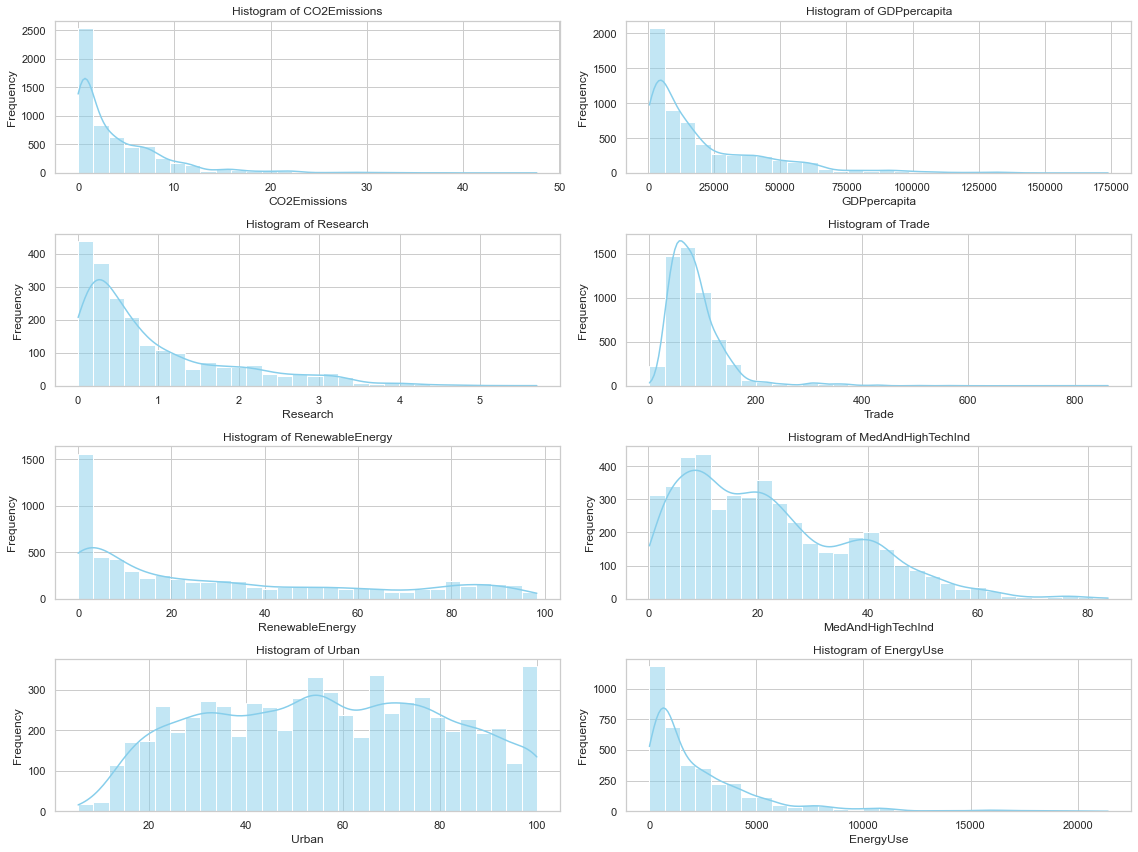

In [44]:
'''new dataframe is data'''
import matplotlib.pyplot as plt
import seaborn as sns
data = df.copy()

# print(data.head(35))
# year_columns = [str(year) for year in range(1990, 2021)]
# data = data.dropna(subset=year_columns)
# print(data.head(35))

year_columns = data.columns[2:]
data = data.dropna(subset=year_columns, how='all')
data[year_columns] = data[year_columns].apply(pd.to_numeric, errors='coerce')
print(data.head(35))

melted_data = pd.melt(data, id_vars=['Country', 'Indicator'], var_name='Year', value_name='Value')
sns.set_theme(style='whitegrid')

indicators_list = [
    'CO2Emissions', 'GDPpercapita', 'Research', 'Trade', 
    'RenewableEnergy', 'MedAndHighTechInd', 'Urban', 'EnergyUse'
]
plt.figure(figsize=(16, 12))

# Loop through each indicator and create a histogram
for i, indicator in enumerate(indicators_list, 1):
    
    indicator_data = melted_data[melted_data['Indicator'] == indicator]
    plt.subplot(4, 2, i)
    
    if not indicator_data['Value'].dropna().empty:
        sns.histplot(indicator_data['Value'].dropna(), bins=30, kde=True, color='skyblue')
        plt.title(f'Histogram of {indicator}')
        plt.xlabel(indicator)
        plt.ylabel('Frequency')
    else:
        plt.title(f'No data for {indicator}')
        plt.xlabel(indicator)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most plots, except for Histogram of Urban, are asymmetrical. Most are skewed to the right with most of the values to the left. Urban does not follow exactly a normal distrubution, but it srelatively symmetrical. CO2 emissions, GDP per capita, reserach, trade, and energy use have very longs tails and heavily skewed to the right. Most are unimodal figures, but MedandHighTechind and Urban are multimodal with more than one peak. 
MedandHighTechind has three small, but distinguishable, peaks. Urban has much smaller but roughly three peaks as well. 

### 2.	For indices with skewed distributions, apply log transformations and plot the histograms again. Did the transformation improve the symmetry?

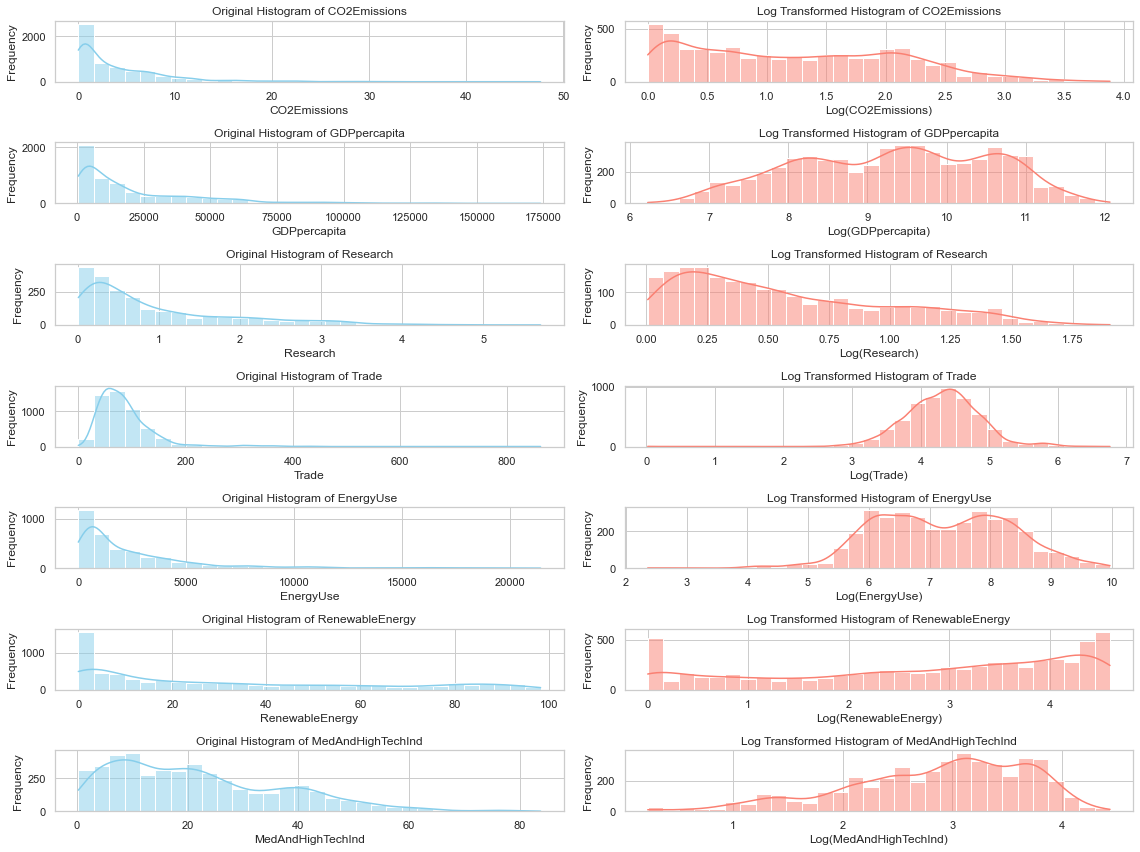

Skewness for CO2Emissions: Original = 2.75, Log Transformed = 0.36
Skewness for GDPpercapita: Original = 1.87, Log Transformed = -0.15
Skewness for Research: Original = 1.44, Log Transformed = 0.73
Skewness for Trade: Original = 3.28, Log Transformed = -0.24
Skewness for EnergyUse: Original = 2.63, Log Transformed = -0.05
Skewness for RenewableEnergy: Original = 0.75, Log Transformed = -0.48
Skewness for MedAndHighTechInd: Original = 0.78, Log Transformed = -0.68


In [45]:
'''CO2 emissions, GDP per capita, reserach, trade, and energy is my skewed plots'''

indicators_list = [
    'CO2Emissions', 'GDPpercapita', 'Research', 'Trade', 'EnergyUse', 'RenewableEnergy', 'MedAndHighTechInd'
]

plt.figure(figsize=(16, 12))

for i, indicator in enumerate(indicators_list, 1):
    indicator_data = melted_data[melted_data['Indicator'] == indicator].copy()  # Use .copy() to avoid SettingWithCopyWarning

    plt.subplot(len(indicators_list), 2, i * 2 - 1)  # Adjusted for a 5x2 grid
    sns.histplot(indicator_data['Value'].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Original Histogram of {indicator}')
    plt.xlabel(indicator)
    plt.ylabel('Frequency')

    indicator_data.loc[:, 'LogValue'] = np.log(indicator_data['Value'].dropna() + 1)  # +1 to avoid log(0)
    
    plt.subplot(len(indicators_list), 2, i * 2)
    sns.histplot(indicator_data['LogValue'].dropna(), bins=30, kde=True, color='salmon')
    plt.title(f'Log Transformed Histogram of {indicator}')
    plt.xlabel(f'Log({indicator})')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

for indicator in indicators_list:
    indicator_data = melted_data[melted_data['Indicator'] == indicator].copy()
    
    original_skewness = indicator_data['Value'].dropna().skew()
    log_skewness = np.log(indicator_data['Value'].dropna() + 1).skew()
    
    print(f'Skewness for {indicator}: Original = {original_skewness:.2f}, Log Transformed = {log_skewness:.2f}')


It did improve the skewness for all but research, RenewableEnergy, and CO2 Emissions are still pretty heavily skewed. Research was known to have many more Nans than the other indicators, so this could be the cause of the skewness towards the right towards zero. EnergyUse has a slight sknewness to the left and two peaks so multimodel. RenewableEnergy has an odd distribution where I cannot tell if it is very skewed or somewhat symmetrical. CO2 emissions is still slightly skewed, but potentially multimodal with two small peaks. It is, again, slightly skewed but also the values are distributed a bit more evenly, and not with an aggressive tail as before. GDP percapita and EnerguUse are a great example of a multimodel plot. 

### 3.	Plot boxplots for each index by income level. Are there differences in the distribution across different income levels?

0                High income
6                High income
7                High income
8                 Low income
10                Low income
                ...         
53562    Lower middle income
53564    Lower middle income
53565    Lower middle income
53566    Lower middle income
53567    Lower middle income
Name: incomeLevel, Length: 40778, dtype: object
   Country  incomeLevel  Year         Value
0      ABW  High income  1990      0.300000
6      ABW  High income  1990  33050.644278
7      ABW  High income  1990     50.319000
8      AFG   Low income  1990     23.000000
10     AFG   Low income  1990      0.191389


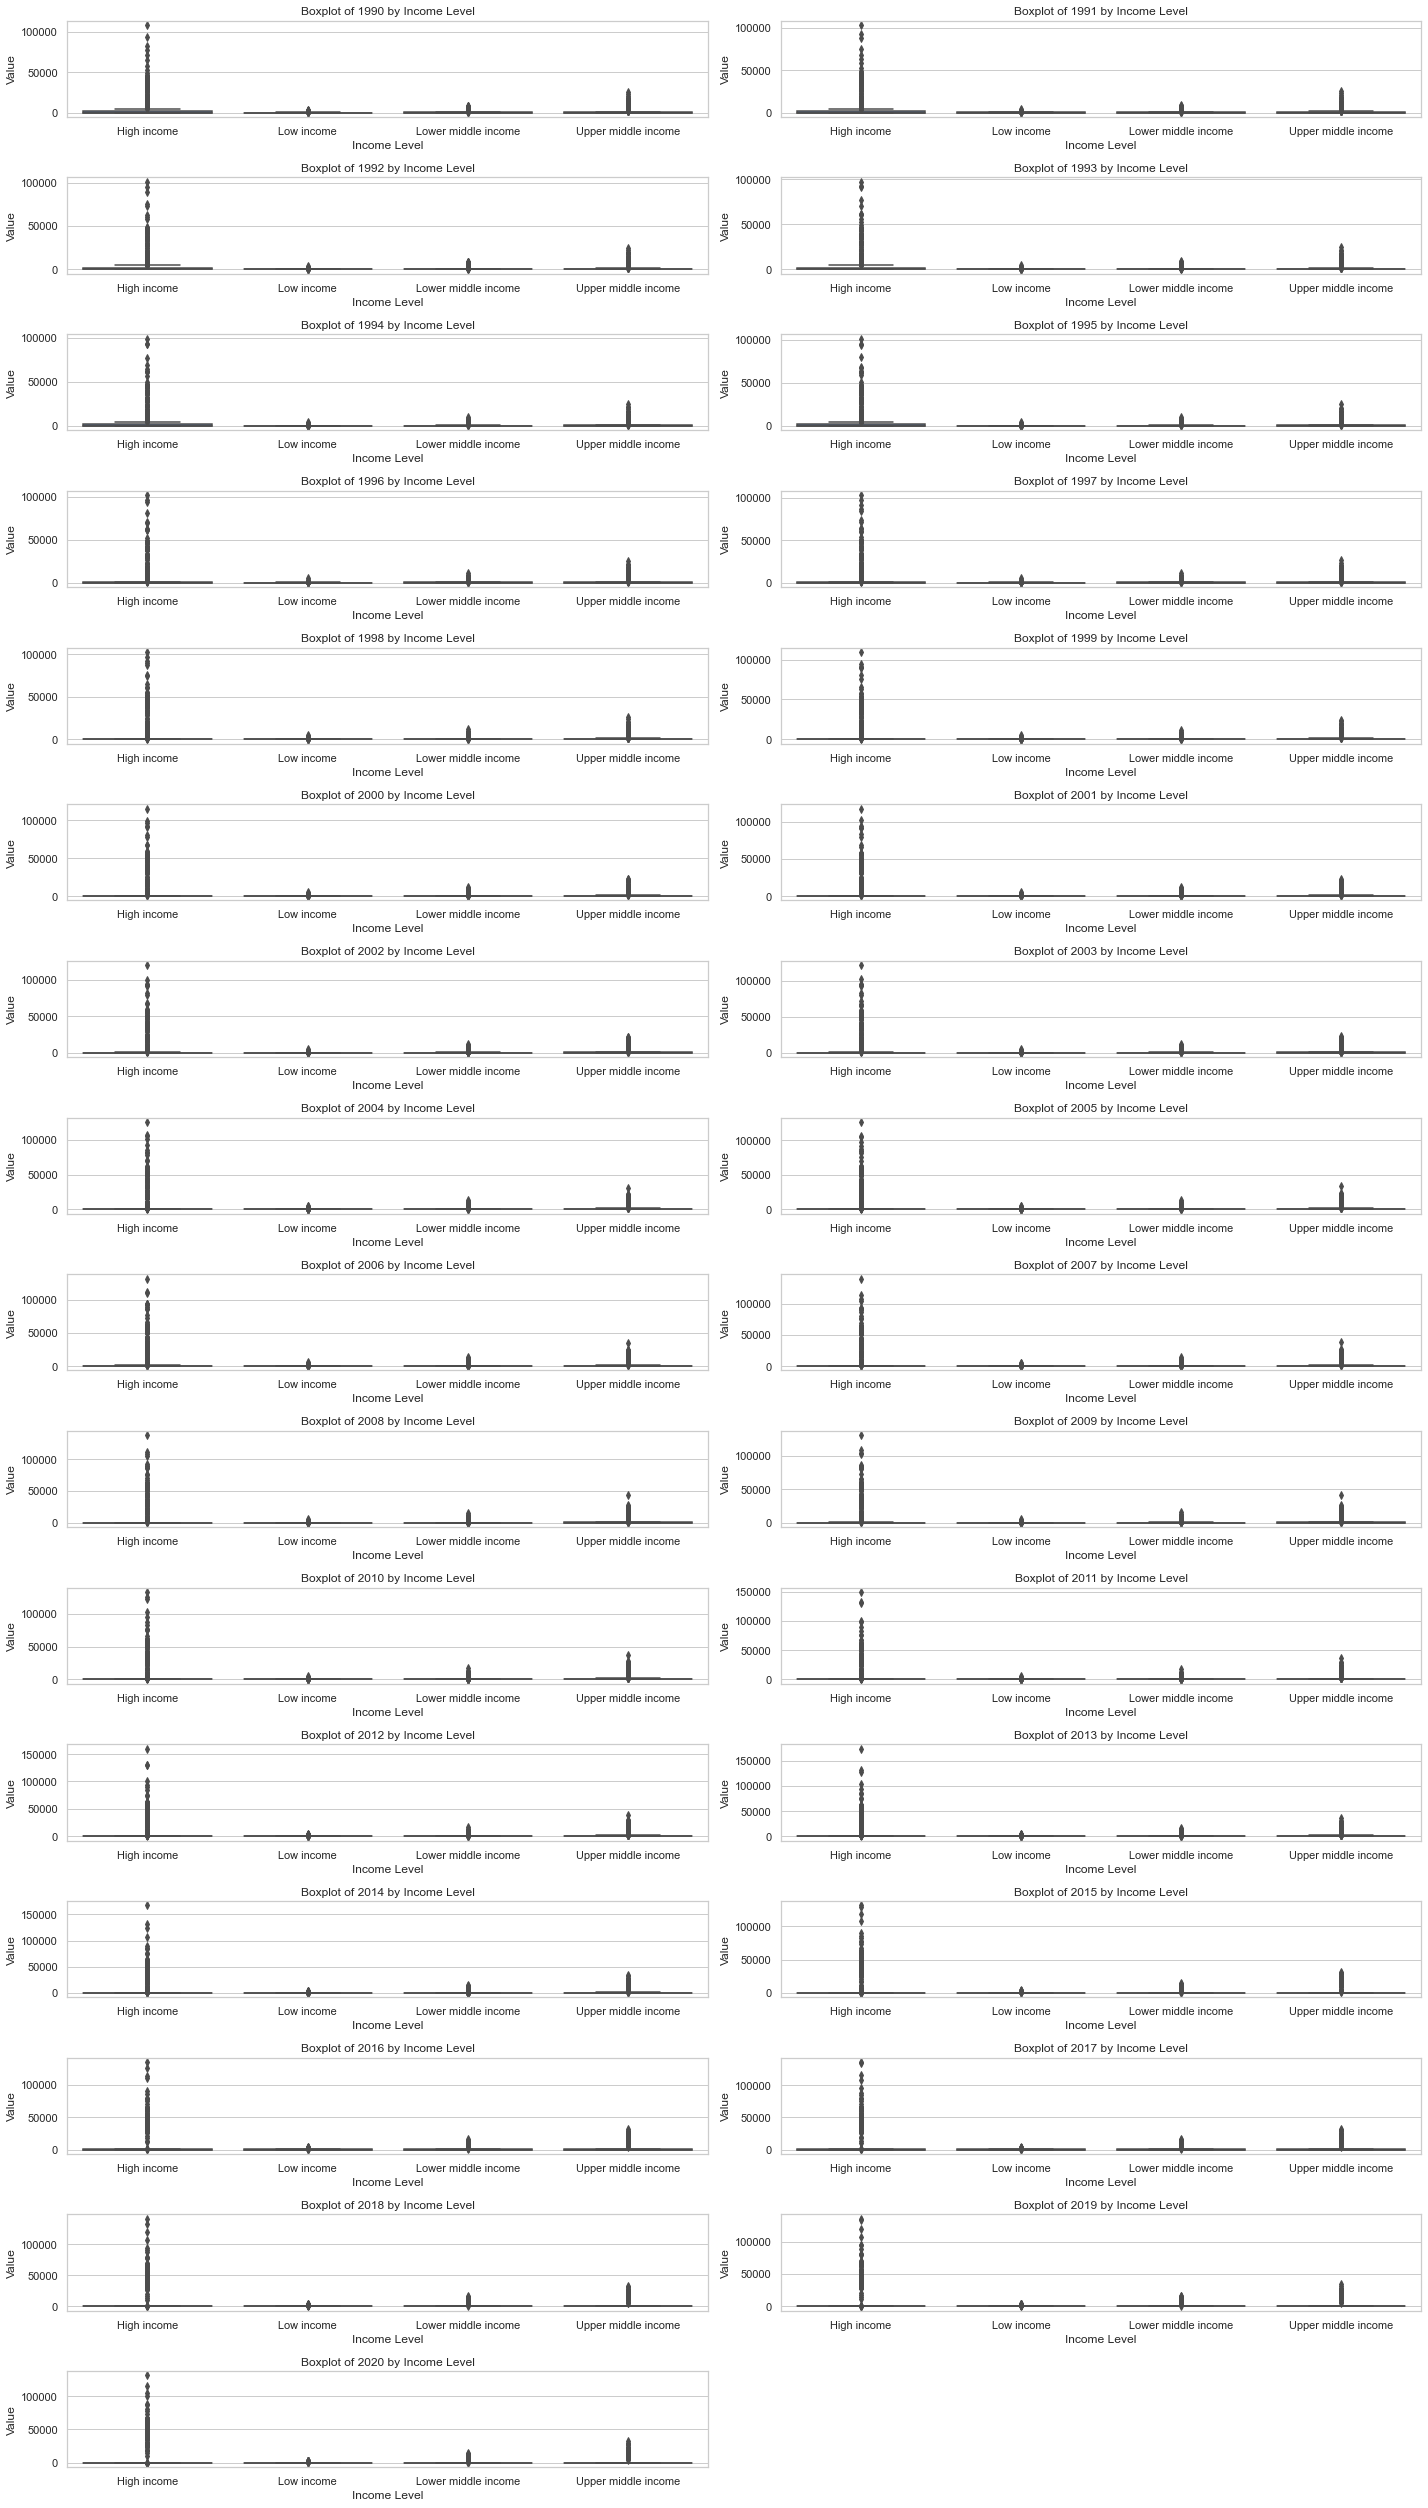

In [46]:
inc_box = df.copy()

#print("Original DataFrame shape:", inc_box.shape)
#print("Original DataFrame columns:", inc_box.columns)
year_columns = inc_box.columns[2:33]
#print("Year Columns:", year_columns)

if isinstance(inc_box.columns, pd.MultiIndex):
    inc_box.columns = ['_'.join(col).strip() for col in inc_box.columns.values]
#print("Flattened DataFrame columns:", inc_box.columns)

try:
    melted_inc_box = pd.melt(
        inc_box,
        id_vars=['Country', 'incomeLevel'],
        value_vars=year_columns, 
        var_name='Year', 
        value_name='Value'
    )
    # print("Melted DataFrame shape:", melted_inc_box.shape)
    # print("Melted DataFrame head:")
    # print(melted_inc_box.head())
except Exception as e:
    print(f"Error during melting: {e}")

melted_inc_box['Value'] = pd.to_numeric(melted_inc_box['Value'], errors='coerce')
nan_count = melted_inc_box['Value'].isnull().sum()
#print(f"Number of NaN values in 'Value': {nan_count}")
melted_inc_box = melted_inc_box.dropna(subset=['Value'])
melted_inc_box['Year'] = melted_inc_box['Year'].astype(str)
print(melted_inc_box['incomeLevel'])
print(melted_inc_box.head())

plt.figure(figsize=(20, 35))
num_years = len(year_columns)
cols = 2
rows = (num_years // cols) + (num_years % cols > 0)

for i, year in enumerate(year_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=melted_inc_box[melted_inc_box['Year'] == year], 
                 x='incomeLevel', y='Value')

    plt.title(f'Boxplot of {year} by Income Level')
    plt.xlabel('Income Level')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


Y-axis (y='Value'): Represents the values of the indicator (e.g., energy use, CO2 emissions) for each country in the corresponding year. In all of the box plots, High income seems to have the most values for each of the indicators. This is saying 'income level across {said} year for {said indicator} for all countries has a higher proportion of High income than other income levels'. Upper middle income seems to come in second for all of the boxplots as well. Evene with varying years and the indicators, the same distribution seems to hold consistent with high and upper middle and followed by lower middle income and then low income. Some of the high income values have different amounts of outliers than other years


### 4.	Run all pairwise scatter plots, find pairs of indices that have the strongest relationships, and discuss the nature of these relationships: monotonic, linear, or non-linear.

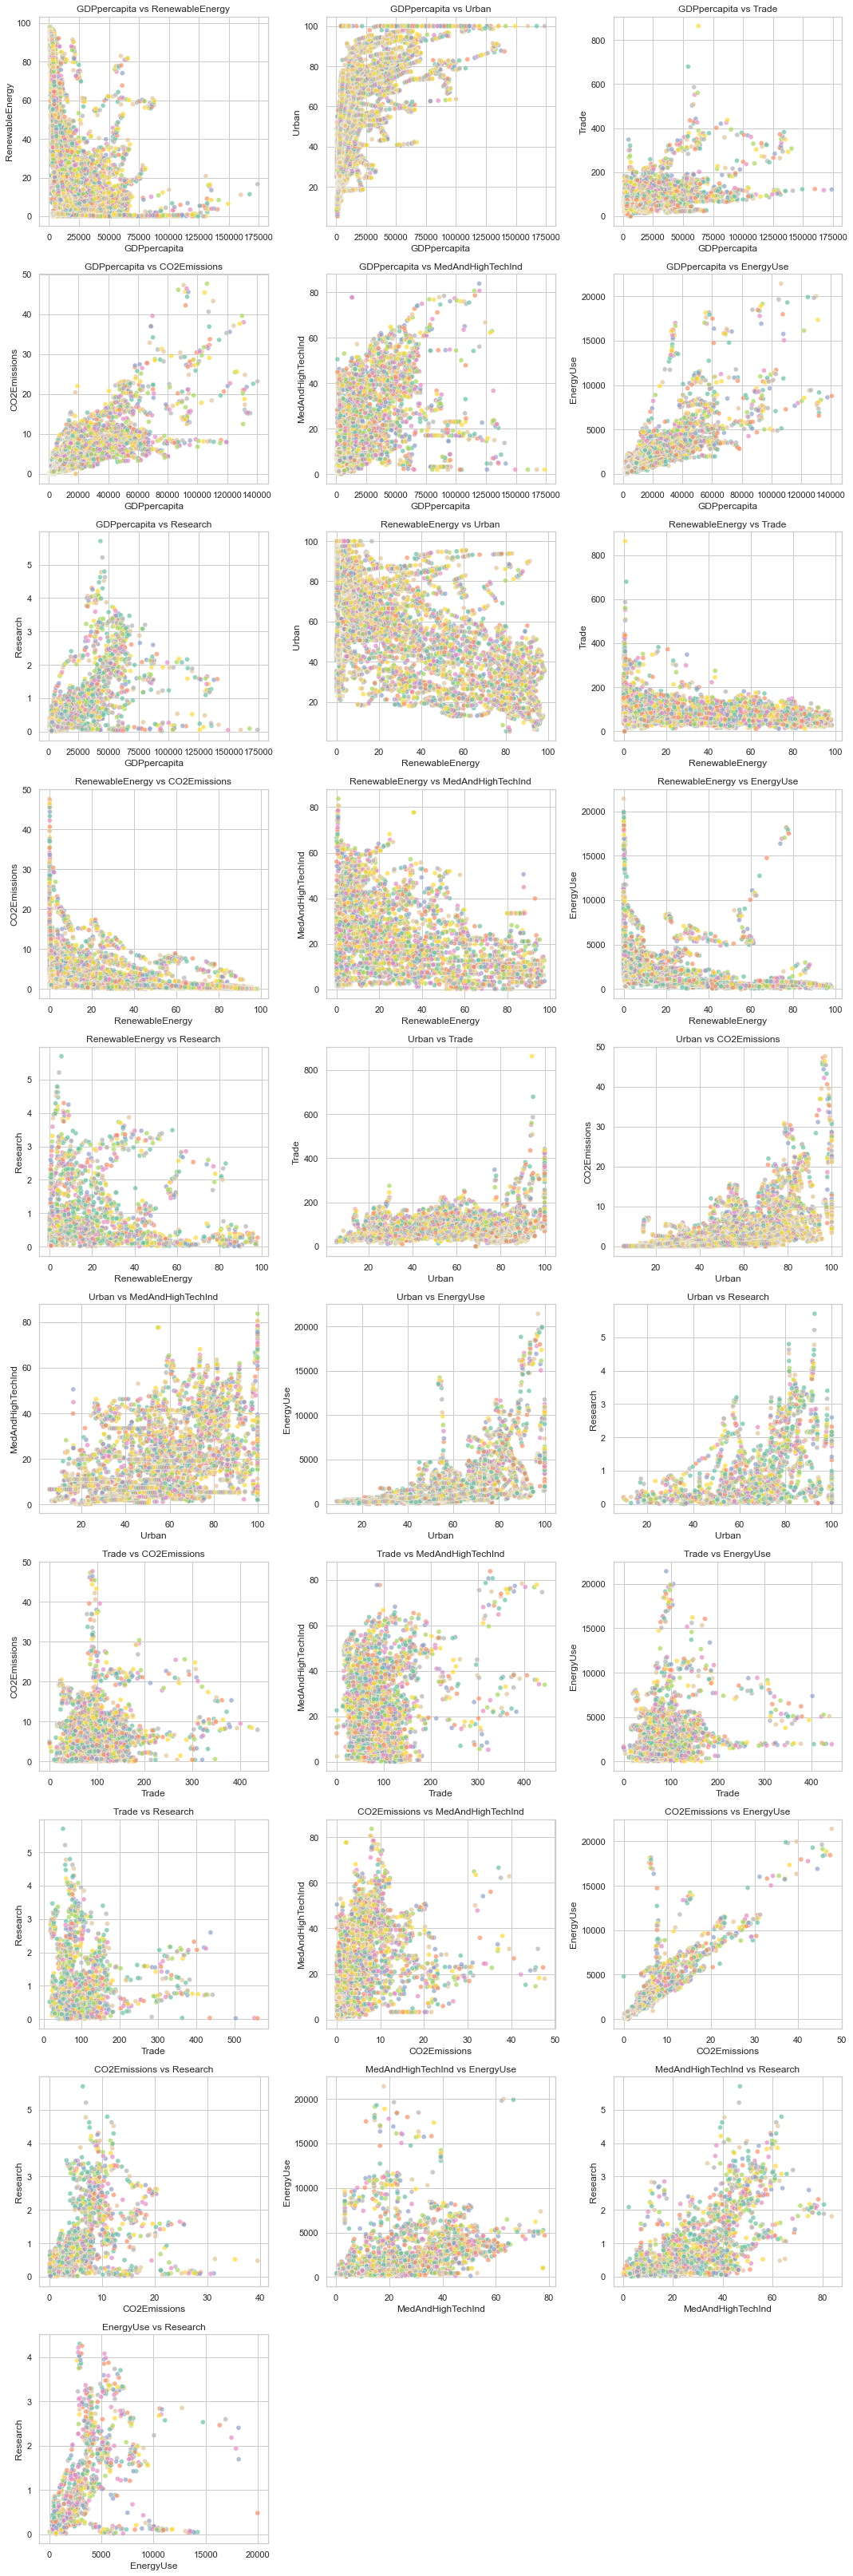

'The colors indicate different years so one color is 1990 one is 1991 etc. I could not get the legend to print without \nit looking super messy\nif you want to see the legend just change legend to True in this line of code'

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import itertools

scatt = df.copy()
numeric_cols = scatt.columns[2:33] 
melted_scatt = pd.melt(scatt, id_vars=['Country', 'Indicator'], 
                       value_vars=numeric_cols, 
                       var_name='Year', value_name='Value')

melted_scatt = melted_scatt.dropna(subset=['Value'])
melted_scatt = melted_scatt.groupby(['Country', 'Year', 'Indicator'], as_index=False).agg({'Value': 'mean'})
indicators = melted_scatt['Indicator'].unique()

indicator_pairs = list(itertools.combinations(indicators, 2))

num_pairs = len(indicator_pairs)
rows = (num_pairs // 3) + (num_pairs % 3 > 0)
cols = 3

plt.figure(figsize=(15, 5 * rows))

for i, (ind1, ind2) in enumerate(indicator_pairs):
    plt.subplot(rows, cols, i + 1)
    data_ind1 = melted_scatt[melted_scatt['Indicator'] == ind1]
    data_ind2 = melted_scatt[melted_scatt['Indicator'] == ind2]
    

    merged_data = pd.merge(data_ind1, data_ind2, on=['Country', 'Year'], suffixes=(f'_{ind1}', f'_{ind2}'))
    sns.scatterplot(data=merged_data, x=f'Value_{ind1}', y=f'Value_{ind2}', hue='Year', palette='Set2', alpha=0.7, legend=False)     #to see the legend change it here to True
    
    # Plot title and axis labels
    plt.title(f'{ind1} vs {ind2}')
    plt.xlabel(ind1)
    plt.ylabel(ind2)

# Add legend after plotting
# handles, labels = plt.gca().get_legend_handles_labels()
# unique_labels = dict(zip(labels, handles))  # Get unique labels
# plt.figlegend(unique_labels.values(), unique_labels.keys(), loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.9])  
plt.show()

'''The colors indicate different years so one color is 1990 one is 1991 etc. I could not get the legend to print without 
it looking super messy
if you want to see the legend just change legend to True in this line of code'''


In [59]:
''' This code excludes self correlations'''
pivot_table = melted_scatt.pivot_table(index='Year', columns='Indicator', values='Value')
lin_corr = pivot_table.corr(method='pearson')
top_lin_corr = lin_corr.unstack().sort_values(ascending=False).drop_duplicates()

# Exclude self-correlations
top_lin_corr = top_lin_corr[top_lin_corr.index.get_level_values(0) != top_lin_corr.index.get_level_values(1)]
print("Top linear correlations:")
print(top_lin_corr.head(10))  

spearman_corr = pivot_table.corr(method='spearman')
top_spearman_corr = spearman_corr.unstack().sort_values(ascending=False).drop_duplicates()

# Exclude self-correlations
top_spearman_corr = top_spearman_corr[top_spearman_corr.index.get_level_values(0) != top_spearman_corr.index.get_level_values(1)]
print("\nTop Spearman correlations (monotonic relationships):")
print(top_spearman_corr.head(10))

Top linear correlations:
Indicator          Indicator        
Urban              GDPpercapita         0.972043
MedAndHighTechInd  Urban                0.951691
GDPpercapita       Trade                0.906377
MedAndHighTechInd  GDPpercapita         0.883587
Research           MedAndHighTechInd    0.829689
Urban              Trade                0.811242
Research           Urban                0.751533
MedAndHighTechInd  EnergyUse            0.690538
Trade              MedAndHighTechInd    0.664587
GDPpercapita       Research             0.606141
dtype: float64

Top Spearman correlations (monotonic relationships):
Indicator          Indicator        
Urban              GDPpercapita         0.984274
MedAndHighTechInd  Urban                0.961694
                   GDPpercapita         0.954839
GDPpercapita       Trade                0.812097
Research           MedAndHighTechInd    0.803077
Urban              Trade                0.775000
Research           Urban                0.768462

##### Urban and GDP per capita are linear relationship and the highest with 0.972043. This could suggest where as GDP increases Urban increases as well and showing that more urban areas have higher GDP. MedAndHighTechInd and Urban are also linearly correlated with a correlation of 0.951691. The lowest correlation is GDPpercapita and Research with their linear correlation at 0.606141. From the scatterplots I am seeing most of the graphs show non-linearity, but the ones that do show linearity, like CO2 emissions and energy use, are not in my table of vaues here. Visually it looks like they would be linear. GDP and Energy use also appear to be lineraly correlated but do not appear on the table either. Some just may be tighter correlated than others.

##### There is also monotonic relationships with again Urban and GDP per capita as the highest with 0.984274. This suggests that as GDP consistently increases urban does as well. All of the monotonic values displayed above show between 0.98 and 0.73 which is a smaller and better range than just linear correlation above. 

In [9]:
#import pandas as pd
'''This one includes self correlations but did not think it would be helpful so I commented out'''
# pivot_table = melted_scatt.pivot_table(index='Year', columns='Indicator', values='Value')
# lin_corr = pivot_table.corr(method='pearson')
# top_lin_corr = lin_corr.unstack().sort_values(ascending=False).drop_duplicates()
# print("Top linear correlations:")
# print(top_lin_corr.head(10))  # Display top 10 correlations for better insights
# spearman_corr = pivot_table.corr(method='spearman')
# top_spearman_corr = spearman_corr.unstack().sort_values(ascending=False).drop_duplicates()
# print("\nTop Spearman correlations (monotonic relationships):")
# print(top_spearman_corr.head(10))  # Display top 10 correlations for better insights


'This one includes self correlations but did not think it would be helpful so I commented out'

### 5.	Create a bar plot for the income levels.

Index(['Country', 'Indicator', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'countryCode',
       'country', 'incomeLevel'],
      dtype='object')
['High income' 'Low income' 'Lower middle income' 'Upper middle income']


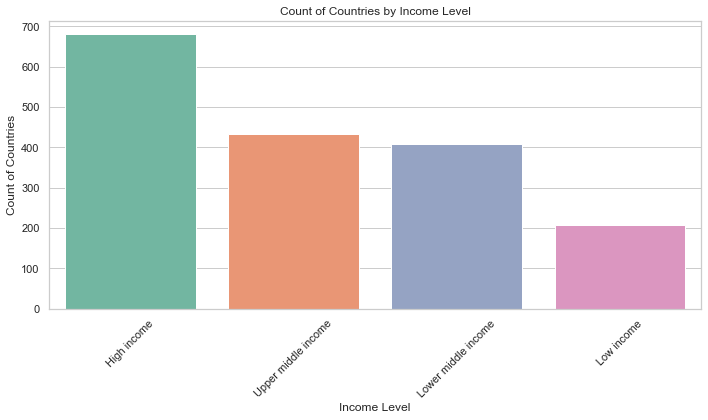

In [60]:
bar_inc = df.copy()
print(bar_inc.columns)
print(bar_inc['incomeLevel'].unique())

income_counts = bar_inc['incomeLevel'].value_counts().reset_index()
income_counts.columns = ['incomeLevel', 'Count']


plt.figure(figsize=(10, 6))
sns.barplot(data=income_counts, x='incomeLevel', y='Count', palette='Set2')
plt.title('Count of Countries by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count of Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.	In the scatter plot of log-transformed CO2 vs log-transformed GDP, color the points by income level. Do you observe any patterns?

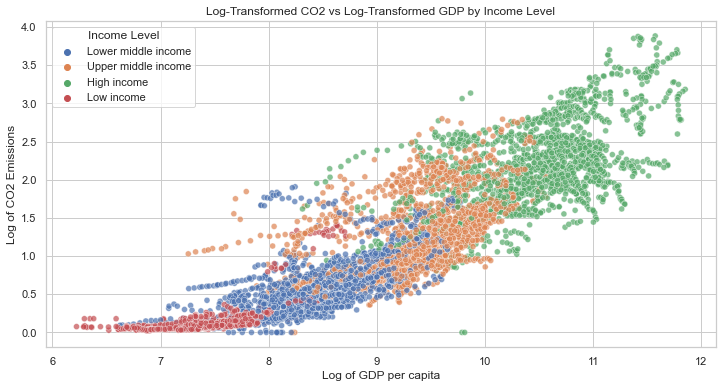

In [61]:
co2_scatt = df.copy()
#print(co2_scatt.columns[2:-2])
co2_melted = co2_scatt[co2_scatt['Indicator'] == 'CO2Emissions'].melt(
    id_vars=['Country', 'incomeLevel'], 
    value_vars=co2_scatt.columns[2:-2], 
    var_name='Year', 
    value_name='CO2Emissions'
)

gdp_melted = co2_scatt[co2_scatt['Indicator'] == 'GDPpercapita'].melt(
    id_vars=['Country', 'incomeLevel'], 
    value_vars=co2_scatt.columns[2:-2], 
    var_name='Year', 
    value_name='GDPpercapita'
)

co2_melted['CO2Emissions'] = pd.to_numeric(co2_melted['CO2Emissions'], errors='coerce')
gdp_melted['GDPpercapita'] = pd.to_numeric(gdp_melted['GDPpercapita'], errors='coerce')

merged_data = pd.merge(co2_melted[['Country', 'Year', 'incomeLevel', 'CO2Emissions']], 
                        gdp_melted[['Country', 'Year', 'GDPpercapita']],
                        on=['Country', 'Year'])

merged_data.dropna(subset=['CO2Emissions', 'GDPpercapita'], inplace=True)

# Convert CO2 and GDP to log scale
merged_data['Log_CO2'] = np.log(merged_data['CO2Emissions'] + 1)  
merged_data['Log_GDP'] = np.log(merged_data['GDPpercapita'] + 1) 


plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='Log_GDP', y='Log_CO2', hue='incomeLevel', alpha=0.7)
plt.title('Log-Transformed CO2 vs Log-Transformed GDP by Income Level')
plt.xlabel('Log of GDP per capita')
plt.ylabel('Log of CO2 Emissions')
plt.legend(title='Income Level')
plt.show()


The scatter plot is a positive correlation where if the countrie has a higher GDP then they usually have higher CO2 emissions. High income dots tend to be at the top right corner showing that the high income countries have hiher GDP and CO2 emission. The low income is bottom left so they have lower GDP and lower CO2 emissions. There are some overlap in the middle where log of CO2 is around 1.0 to 2.5 showing that some high income and upper middle income countries have lower CO2 emissions as well as lower GDP. There are even some low income dots (at gridline 8, 1.0 and 9, 1.5) there showing that even though the cpuntry is low income some have higher GDP AND higher Co2 than other low income countries. 

### 7.	Repeat step 6, but now average both log-transformed CO2 and log-transformed GDP values over years. Do you observe any patterns?

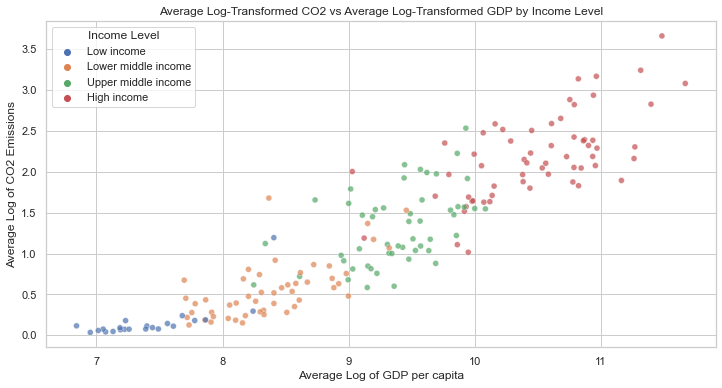

In [62]:
average_data = merged_data.groupby(['Country', 'incomeLevel'])[['Log_CO2', 'Log_GDP']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=average_data, x='Log_GDP', y='Log_CO2', hue='incomeLevel', alpha=0.7)
plt.title('Average Log-Transformed CO2 vs Average Log-Transformed GDP by Income Level')
plt.xlabel('Average Log of GDP per capita')
plt.ylabel('Average Log of CO2 Emissions')
plt.legend(title='Income Level')
plt.show()

This graph has a similar distribution as the graph above. Low income is in the bottom corner signaling that countries with low income have lower CO2 emissions and lower GDP. High income is to the top right with high GDP and high CO2 emissions. There is a positive correlation between GDP and CO2 emissions. The data is increasing in order of income level from low income bottom left to high income in the top right, in order from lowest to highest. The graph is not perfectly linear, but we can still see a positive correlation between the data. There are also some income levels/countries mingling in the middle that have different GDP/CO2 levels than other countries with the same income level. The values are indeed more spread out and less uniform than the previous figure. It is much easier to see the data points individually. 

#### 8.	Repeat step 6 again, but now average both log-transformed CO2 and log-transformed GDP values over countries. Do you observe any patterns?

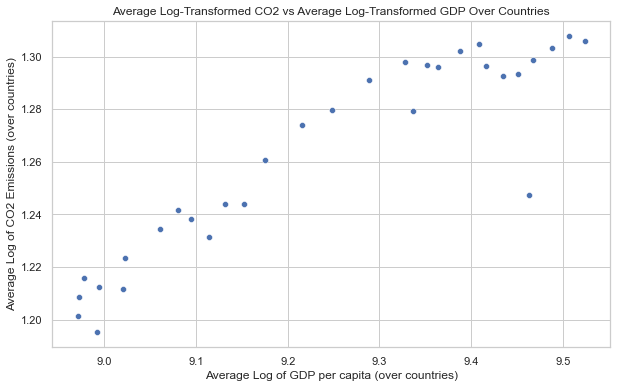

In [63]:
average_over_countries = merged_data.groupby('Year', as_index=False).agg({
    'Log_CO2': 'mean',
    'Log_GDP': 'mean'
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=average_over_countries, x='Log_GDP', y='Log_CO2')
plt.title('Average Log-Transformed CO2 vs Average Log-Transformed GDP Over Countries')
plt.xlabel('Average Log of GDP per capita (over countries)')
plt.ylabel('Average Log of CO2 Emissions (over countries)')
plt.show()

The plot shows the average global GDP per capita relating to average global CO2 emissions. Because it is by countries then the plot shows more of a global trend rather than a year trend. There is still a positive trend in the data but it is not as uniform as the previous two plots. This is still saying thats as GDP increases so does CO2 emissions. As the years get more modern there is more GDP and CO2 emissions, but there is a drop slightly at the top.  Where the graph sort of plateuas at the top could indicate CO2 emission reduction in high GDP, because some high GDP countries could be turning to less carbon-emissive industries or cars. 

#### 9.	Do you see any difference in  patters from  7.8.9?

The graph from question 6 has more distinct clusters of the income levels so it is easier to see which income levels are associated with the correlation between CO2 and GDP. There is more noise because we are assessing all the countries GDP and CO2 values over the years. Its hard to distinguish anything, like if there is a drop in CO2 or if some income levels stray from their clusters, besides a postive trend.

The graph from question 7 has less noise given that we took the average of the log values and there is less year to year fluctuations. It is a more defined graph and it is easier to see the income level groups and see if there are any income level points that stray from the relative cluster. This allows us to see better how the CO2/GDP correlation values of the countries over the years align with the countries income levels. This shows more of the relationship between CO2 and GDP and we can see how CO2 directly relates to GDP over the years.

The graph from question 8 focues on the global average between CO2 and GDP, because the values are averaged across all countries for each year. This is showing more of a trend where as the years become mroe modern GDP and CO2 increase. This is probably likely due to an increase in industrial/business/market/cars. There is a slight dip down showing that even when there is HIGH GDP there is a slight lower of CO2 emissions suggesting that some countries have turned to low carbon emission activities. This visual would be hard to see in the prior two graphs.

## For log transformed CO2 emission
### 10. Calculate the average of it over countries, plot against the years Discuss the trend


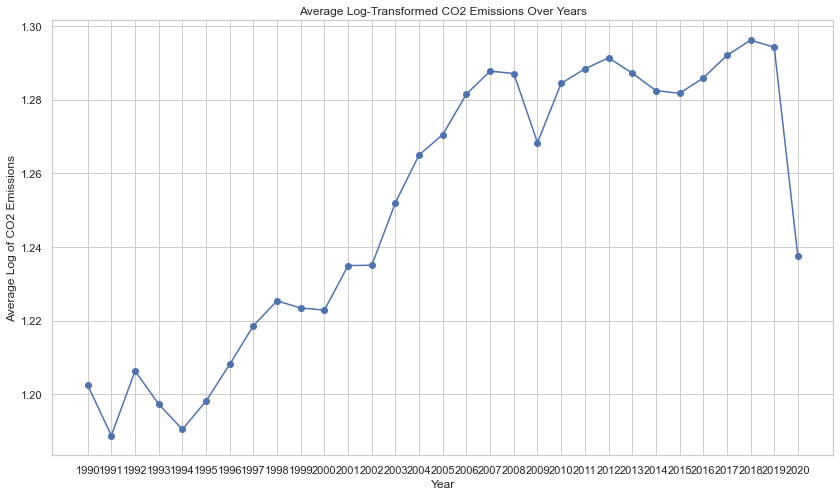

In [64]:
log_co2 = df.copy()

co2_melted = log_co2[log_co2['Indicator'] == 'CO2Emissions'].melt(
    id_vars=['Country'], 
    value_vars=log_co2.columns[2:-3],
    var_name='Year', 
    value_name='CO2Emissions'
)

co2_melted['CO2Emissions'] = pd.to_numeric(co2_melted['CO2Emissions'], errors='coerce')
co2_melted['Log_CO2'] = np.log(co2_melted['CO2Emissions'] + 1)
avg_log_co2_per_year = co2_melted.groupby('Year')['Log_CO2'].mean()

plt.figure(figsize=(14, 8))
plt.plot(avg_log_co2_per_year.index, avg_log_co2_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Log-Transformed CO2 Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Average Log of CO2 Emissions')
plt.grid(True)
plt.show()




There is loosely an increasing trend of average CO2 emissions of the years. There are a few dips in the beginning such as 1991 or 1994 and then there is an increase from 1994 to around 2008. There is a dip in 2009 signaling that there could be a decrease in CO2 emissions from the countries during that year. It is then followed by a sharp increase to a small plateau before a substantial drop down between 2019 and 2020. The large drop between 2019 and 2020 could be dude to the pandemic where everyone limited travel and stayed at home.

### 11. which countries have the highest CO2 (top3), which ciontirs have the lowest CO2(bottom 3)

In [69]:
country_co2_total = co2_melted.groupby('Country')['CO2Emissions'].sum().reset_index()
country_co2_sorted = country_co2_total.sort_values(by='CO2Emissions', ascending=False)
top_3_countries = country_co2_sorted.head(3)
bottom_3_countries = country_co2_sorted.tail(3)

print("top 3 countries of CO2 emissions:")
print(top_3_countries)

print("\nbottom 3 countries of CO2 emissions:")
print(bottom_3_countries)

top 3 countries of CO2 emissions:
    Country  CO2Emissions
163     QAT   1189.197407
5       ARE    772.705560
106     KWT    729.191715

bottom 3 countries of CO2 emissions:
    Country  CO2Emissions
46      CUW           0.0
184     SXM           0.0
0       ABW           0.0


### 12 For each index, plot a scatterplot of that index against log-transformed CO2. If you log-transformed that index in step 2, keep it log-transformed here. Which indices appear to have a relationship with CO2?

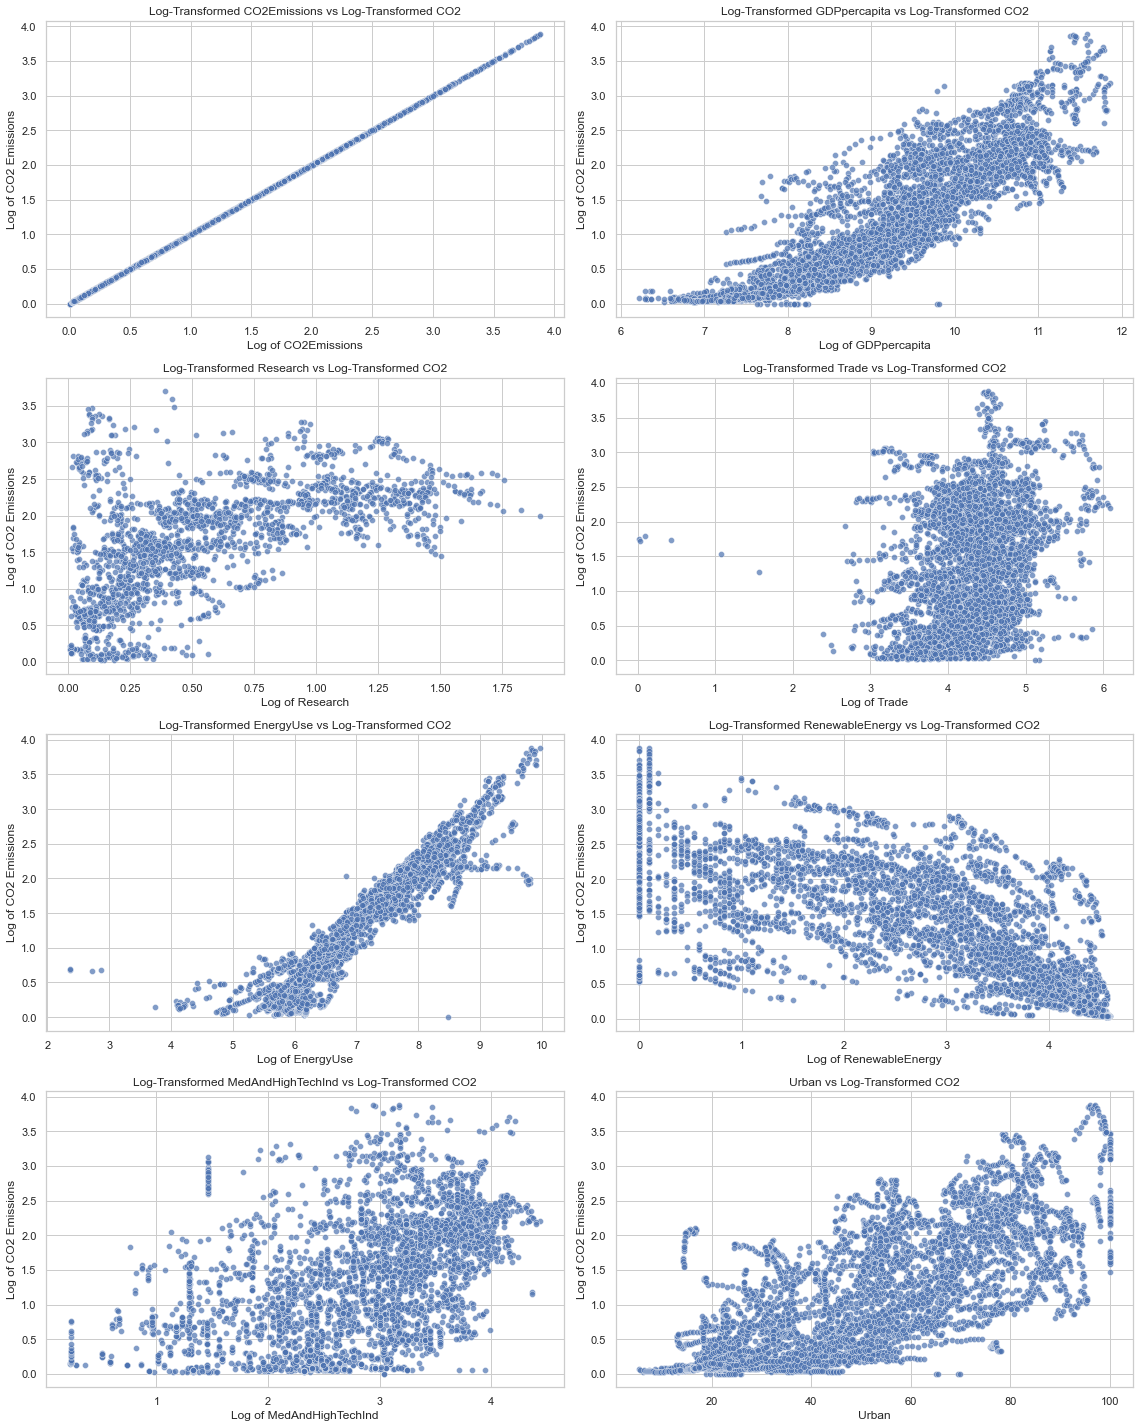

In [70]:

logplot = df.copy()
# 'CO2Emissions', 'GDPpercapita', 'Research', 'Trade', 'EnergyUse', 'RenewableEnergy', 'MedAndHighTechInd'
log_transform_indicators = [
    'CO2Emissions', 'GDPpercapita', 'Research', 'Trade', 'EnergyUse', 'RenewableEnergy', 'MedAndHighTechInd'
]
raw_indicators = [
    'Urban'
] 
#'RenewableEnergy', 'MedAndHighTechInd', 
#because they weren't log transformed in step 2

co2_data = logplot[logplot['Indicator'] == 'CO2Emissions'].melt(
    id_vars=['Country'], value_vars=logplot.columns[2:-2], 
    var_name='Year', value_name='CO2Emissions'
)

co2_data['CO2Emissions'] = pd.to_numeric(co2_data['CO2Emissions'], errors='coerce')
co2_data.dropna(subset=['CO2Emissions'], inplace=True)
co2_data['Log_CO2'] = np.log(co2_data['CO2Emissions'] + 1)  # Log-transform CO2 emissions

plt.figure(figsize=(16, 20)) 

for i, indicator in enumerate(log_transform_indicators, 1):
    # Filter the data for the current indicator
    indicator_data = logplot[logplot['Indicator'] == indicator].melt(
        id_vars=['Country'], value_vars=logplot.columns[2:-2], 
        var_name='Year', value_name=indicator
    )
    
    indicator_data[indicator] = pd.to_numeric(indicator_data[indicator], errors='coerce')
    indicator_data.dropna(subset=[indicator], inplace=True)
    indicator_data[f'Log_{indicator}'] = np.log(indicator_data[indicator] + 1)
    merged_data = pd.merge(co2_data[['Country', 'Year', 'Log_CO2']], 
                           indicator_data[['Country', 'Year', f'Log_{indicator}']],
                           on=['Country', 'Year'])

    
    plt.subplot(4, 2, i) 
    sns.scatterplot(x=f'Log_{indicator}', y='Log_CO2', data=merged_data, alpha=0.7)
    plt.title(f'Log-Transformed {indicator} vs Log-Transformed CO2')
    plt.xlabel(f'Log of {indicator}')
    plt.ylabel('Log of CO2 Emissions')

# Raw indicators scatterplots (plotted against log-transformed CO2)
for j, indicator in enumerate(raw_indicators, 1):
    indicator_data = logplot[logplot['Indicator'] == indicator].melt(
        id_vars=['Country'], value_vars=logplot.columns[2:-2], 
        var_name='Year', value_name=indicator
    )
    indicator_data[indicator] = pd.to_numeric(indicator_data[indicator], errors='coerce')
    indicator_data.dropna(subset=[indicator], inplace=True)
    merged_data = pd.merge(co2_data[['Country', 'Year', 'Log_CO2']], 
                           indicator_data[['Country', 'Year', indicator]],
                           on=['Country', 'Year'])
    plt.subplot(4, 2, i + j)
    sns.scatterplot(x=indicator, y='Log_CO2', data=merged_data, alpha=0.7)
    plt.title(f'{indicator} vs Log-Transformed CO2')
    plt.xlabel(indicator)
    plt.ylabel('Log of CO2 Emissions')

plt.tight_layout()
plt.show()



Log transformed EnergyUse against log-CO2 seems to have a positive correlation and shows a more distinct trend than any of the other graphs. This would make sense because as energy use increases CO2 emissions would also increase. Log renewable energy against log CO2 appears to have a negative correlation, though it spreads out with a lot of noise. This also makes sense becayse if there is more renewable energy being used this would cause less CO2 emissions. Urban against logCO2 seems very noisy but is trending towards a positive correlation. Log GDP against LOg CO2 also looks positively correlated, which would make sense because if a country has higher GDP (and thus more industries and cars) CO2 emissions would go up. All other figures look very noisy and messy and hard to determine a trend.

### 13 For each index and each country, subtract the average of that index for the country from each observation (i.e., center the data for each country) and repeat step 12. Does the relationship between the indices and CO2 change after centering the data?

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/chr

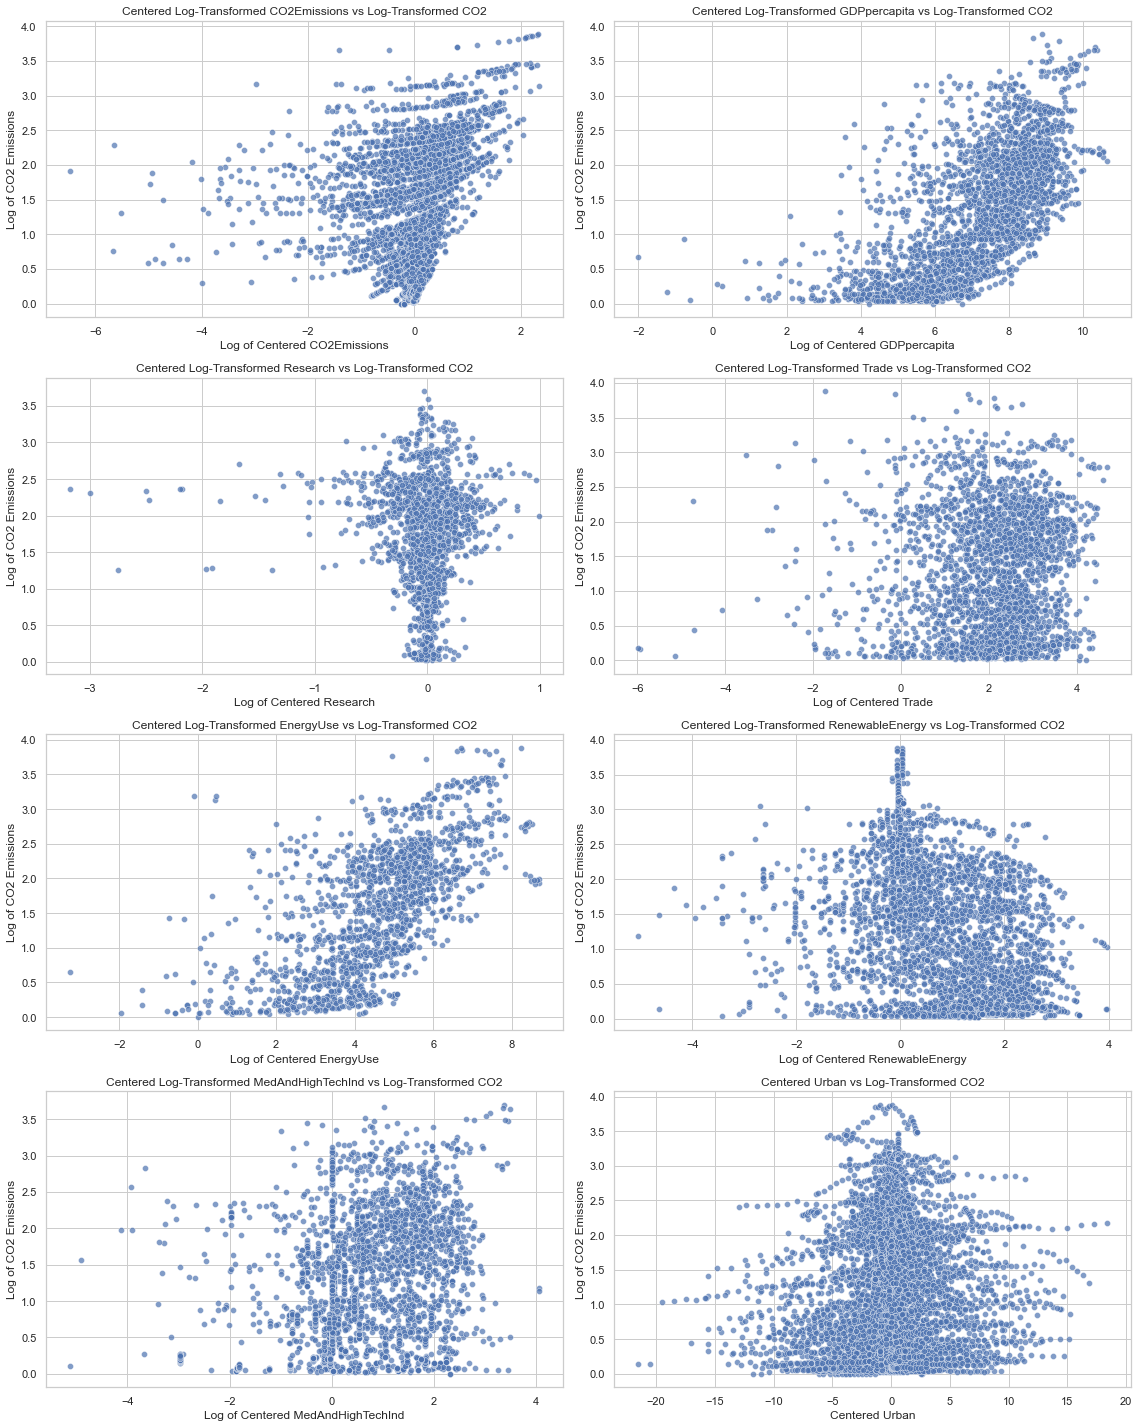

In [72]:
logplot = df.copy()

log_transform_indicators = [
    'CO2Emissions', 'GDPpercapita', 'Research', 'Trade', 'EnergyUse', 'RenewableEnergy', 'MedAndHighTechInd'
]
raw_indicators = [
    'Urban'
]
#'RenewableEnergy', 'MedAndHighTechInd',

co2_data = logplot[logplot['Indicator'] == 'CO2Emissions'].melt(
    id_vars=['Country'], value_vars=logplot.columns[2:-2], 
    var_name='Year', value_name='CO2Emissions'
)

co2_data['CO2Emissions'] = pd.to_numeric(co2_data['CO2Emissions'], errors='coerce')
co2_data.dropna(subset=['CO2Emissions'], inplace=True)
co2_data['Log_CO2'] = np.log(co2_data['CO2Emissions'] + 1)

plt.figure(figsize=(16, 20))

for i, indicator in enumerate(log_transform_indicators, 1): #going through each of the indoctaors
    indicator_data = logplot[logplot['Indicator'] == indicator].melt(
        id_vars=['Country'], value_vars=logplot.columns[2:-2], 
        var_name='Year', value_name=indicator
    )

    indicator_data[indicator] = pd.to_numeric(indicator_data[indicator], errors='coerce')
    indicator_data.dropna(subset=[indicator], inplace=True)
    indicator_data[f'Centered_{indicator}'] = indicator_data.groupby('Country')[indicator].transform(lambda x: x - x.mean())
    indicator_data[f'Log_Centered_{indicator}'] = np.log(indicator_data[f'Centered_{indicator}'] + 1)

    merged_data = pd.merge(co2_data[['Country', 'Year', 'Log_CO2']], 
                           indicator_data[['Country', 'Year', f'Log_Centered_{indicator}']],
                           on=['Country', 'Year'])
    
    plt.subplot(4, 2, i) 
    sns.scatterplot(x=f'Log_Centered_{indicator}', y='Log_CO2', data=merged_data, alpha=0.7)
    plt.title(f'Centered Log-Transformed {indicator} vs Log-Transformed CO2')
    plt.xlabel(f'Log of Centered {indicator}')
    plt.ylabel('Log of CO2 Emissions')


for j, indicator in enumerate(raw_indicators, 1):
    indicator_data = logplot[logplot['Indicator'] == indicator].melt(
        id_vars=['Country'], value_vars=logplot.columns[2:-2], 
        var_name='Year', value_name=indicator
    )
    
    indicator_data[indicator] = pd.to_numeric(indicator_data[indicator], errors='coerce')
    indicator_data.dropna(subset=[indicator], inplace=True)
    indicator_data[f'Centered_{indicator}'] = indicator_data.groupby('Country')[indicator].transform(lambda x: x - x.mean())
    merged_data = pd.merge(co2_data[['Country', 'Year', 'Log_CO2']], 
                           indicator_data[['Country', 'Year', f'Centered_{indicator}']],
                           on=['Country', 'Year'])
    
    plt.subplot(4, 2, i + j)
    sns.scatterplot(x=f'Centered_{indicator}', y='Log_CO2', data=merged_data, alpha=0.7)
    plt.title(f'Centered {indicator} vs Log-Transformed CO2')
    plt.xlabel(f'Centered {indicator}')
    plt.ylabel('Log of CO2 Emissions')

plt.tight_layout()
plt.show()

The relationships are relatively the same as the previous graphs, but interpreting the data is much different. For centered log renewable energy vs logCO2, because it is slightly cone shaped and a lot of the values hover at the 0 mark on the X axis or more positive this would mean that the indicator values are close to the country averages or somewhat performing above average. Log transformed research against logCO2 and urban against logcO2 are also making this cone shape with most data points at 0. This basically is telling us that many countries have values for these particular indicators that are similar to their respective averages. log medandhightech against logCO2 plots still has many points hovering at 0, but seem to spread to both negative an dpositive indicatings ome countries are performing above average and some less than average.

In urban against logcO2 there are still some points that deviate from the 0 line showing that some are performing above average and some are below their average hinting at a potential positive correlation, but there seems to be too much noise. Also for these figures there is most likely a week or non-linear relationship to log CO2, because if the deviations from averages are small then the relationship won't be as strong.

For logGDP against logCO2 we can see most of the points are above the 0 line indicating that some countries are performing better than their average. The data points are also increasing up towards the right corner. Log energyuse and log CO2 are also mostly above 0 and the data points are also increasing up towards the right corner. This could show that there is a positive correlation between these values. This could hint at a stronger relationship.

### 14  Repeat 13 but now remove averages by Year 

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/chr

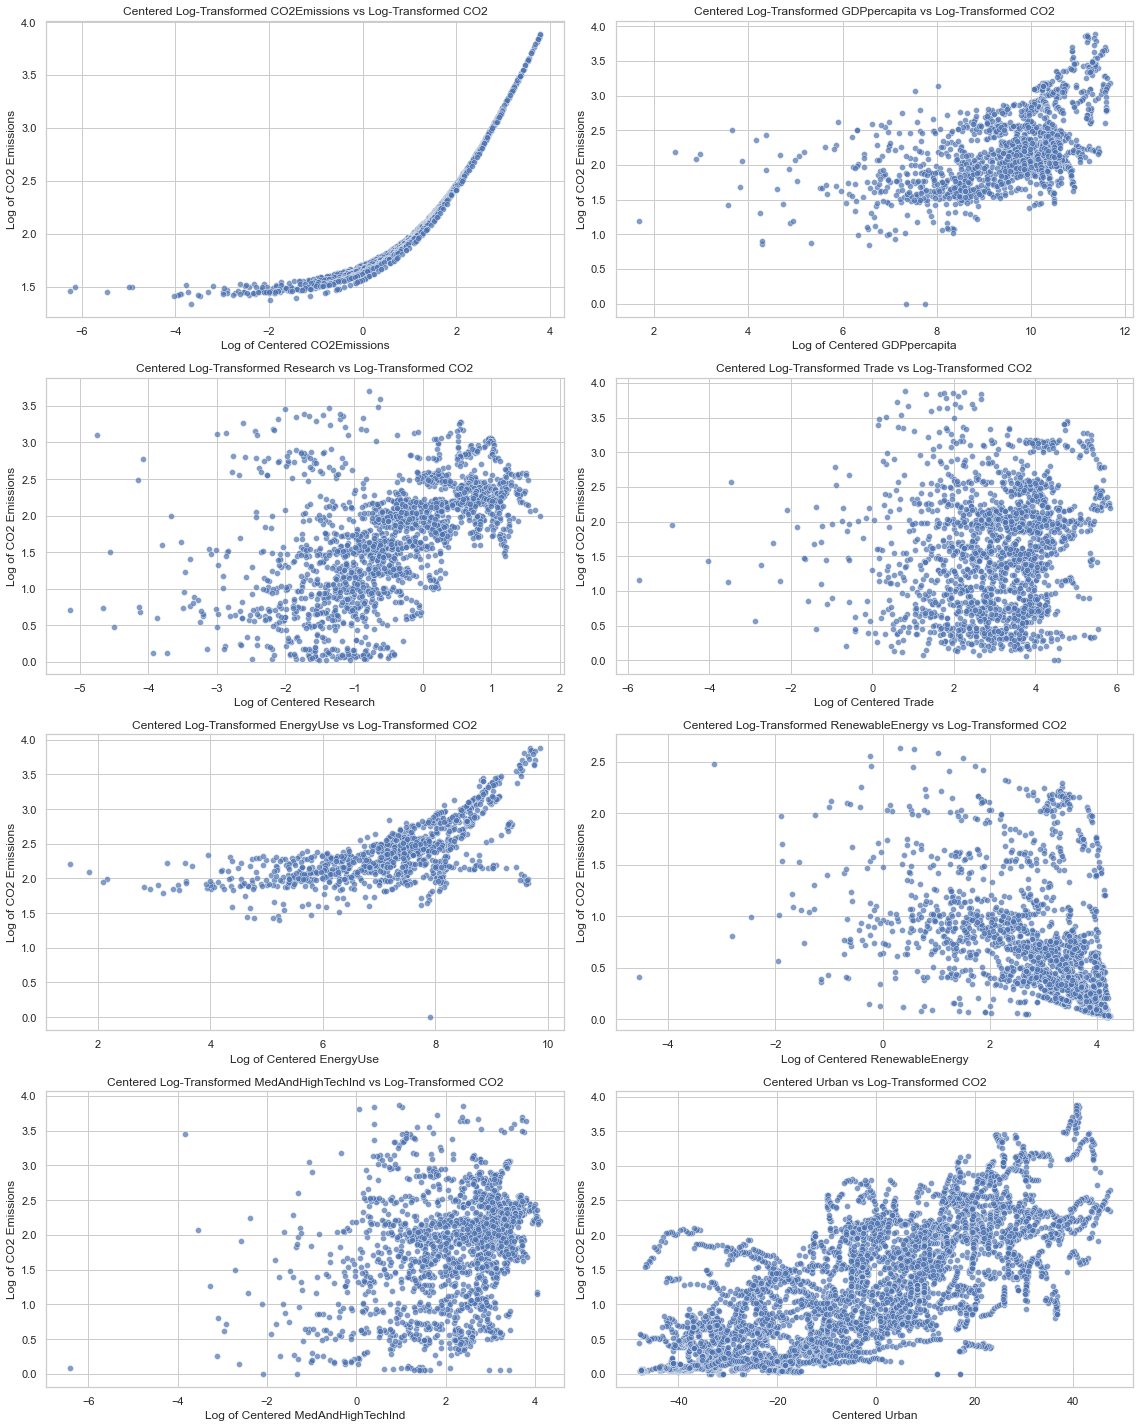

In [73]:
logplot = df.copy()

# log_transform_indicators = [
#     'GDPpercapita', 'Research', 'Trade', 'EnergyUse'
# ]
# raw_indicators = [
#     'RenewableEnergy', 'MedAndHighTechInd', 'Urban'
# ]
log_transform_indicators = [
    'CO2Emissions', 'GDPpercapita', 'Research', 'Trade', 'EnergyUse', 'RenewableEnergy', 'MedAndHighTechInd'
]
raw_indicators = [
    'Urban'
]
#'RenewableEnergy', 'MedAndHighTechInd',

co2_data = logplot[logplot['Indicator'] == 'CO2Emissions'].melt(
    id_vars=['Country'], value_vars=logplot.columns[2:-2], 
    var_name='Year', value_name='CO2Emissions'
)

co2_data['CO2Emissions'] = pd.to_numeric(co2_data['CO2Emissions'], errors='coerce')
co2_data.dropna(subset=['CO2Emissions'], inplace=True)
co2_data['Log_CO2'] = np.log(co2_data['CO2Emissions'] + 1)

plt.figure(figsize=(16, 20))

for i, indicator in enumerate(log_transform_indicators, 1):
    indicator_data = logplot[logplot['Indicator'] == indicator].melt(
        id_vars=['Country'], value_vars=logplot.columns[2:-2], 
        var_name='Year', value_name=indicator
    )
    
    indicator_data[indicator] = pd.to_numeric(indicator_data[indicator], errors='coerce')
    indicator_data.dropna(subset=[indicator], inplace=True)

    indicator_data[f'Centered_{indicator}'] = indicator_data.groupby('Year')[indicator].transform(lambda x: x - x.mean())
    indicator_data[f'Log_Centered_{indicator}'] = np.log(indicator_data[f'Centered_{indicator}'] + 1)
    merged_data = pd.merge(co2_data[['Country', 'Year', 'Log_CO2']], 
                           indicator_data[['Country', 'Year', f'Log_Centered_{indicator}']],
                           on=['Country', 'Year'])
    
    plt.subplot(4, 2, i) 
    sns.scatterplot(x=f'Log_Centered_{indicator}', y='Log_CO2', data=merged_data, alpha=0.7)
    plt.title(f'Centered Log-Transformed {indicator} vs Log-Transformed CO2')
    plt.xlabel(f'Log of Centered {indicator}')
    plt.ylabel('Log of CO2 Emissions')

for j, indicator in enumerate(raw_indicators, 1):
    indicator_data = logplot[logplot['Indicator'] == indicator].melt(
        id_vars=['Country'], value_vars=logplot.columns[2:-2], 
        var_name='Year', value_name=indicator
    )
    
    indicator_data[indicator] = pd.to_numeric(indicator_data[indicator], errors='coerce')
    indicator_data.dropna(subset=[indicator], inplace=True)
    indicator_data[f'Centered_{indicator}'] = indicator_data.groupby('Year')[indicator].transform(lambda x: x - x.mean()) #calculate the mean of each indicator for each year
    merged_data = pd.merge(co2_data[['Country', 'Year', 'Log_CO2']], 
                           indicator_data[['Country', 'Year', f'Centered_{indicator}']],
                           on=['Country', 'Year'])
    
    plt.subplot(4, 2, i + j)
    sns.scatterplot(x=f'Centered_{indicator}', y='Log_CO2', data=merged_data, alpha=0.7)
    plt.title(f'Centered {indicator} vs Log-Transformed CO2')
    plt.xlabel(f'Centered {indicator}')
    plt.ylabel('Log of CO2 Emissions')

plt.tight_layout()
plt.show()


Yes the relationships do change in comparison to the other graphs. Urban against log CO2 now shows more of a positive correlation with the data points from bottom left corner up to the top right. The points are still very noisy so it is hard to tell if it is significant. 

Log Renewable energy against log CO2 is sort of a negative correlation, with lots of points at positive 4 but spread out and up to the left towards the negatives, which again makes sense where as time progresses and more countries utilize reneweable energy, there will be less CO2 emissions. Log transformed research aginst CO2 has many values in the negatives but trending up indicating a positive correlaton. The points are still scattered a lot indicating a weak relationship. Log trade against CO2 hovers between 2-4 on the x axis but there is no defined trend and points are scattered indicating a weak relationship. Log energy use against log CO2 has a very distinct trend with values in the positive and trending upwards. Log GDP against log CO2 is also is trending upwards signifying a positive correlation, but some points are still scattered on the low end so it is hard to determine the strength of the relationship. This could suggest, though, that some countries had lower gdp and/or emission in some years and then it increase with GDP and CO2 emissions throughout the years.Log MedandHighTech against CO2 has little correlation and is scattered, but most of th epoints are above zero indicating that as there is more tech industry there is more CO2 emission.